In [82]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print("Tensorflow版本是：",tf.__version__)
                         

Tensorflow版本是： 2.6.0


## 数据获取

In [14]:
mnist = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [15]:
print("Train image shape:",train_images.shape,"Train label shape:",train_labels.shape)
print("Test image shape:",test_images.shape,"Test label shape:",test_labels.shape)

Train image shape: (60000, 28, 28) Train label shape: (60000,)
Test image shape: (10000, 28, 28) Test label shape: (10000,)


In [16]:
print("images data :",train_images[1])

images data : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 

In [23]:
import matplotlib.pyplot as plt

def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap = 'binary')
    plt.show()

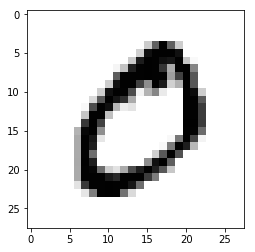

In [25]:
plot_image(train_images[1])

## 划分验证集

In [27]:
total_num = len(train_images)
valid_split = 0.2 #验证集的比例占20%
train_num = int(total_num*(1-valid_split)) #训练集的数目

train_x = train_images[:train_num] #前部分给训练集
train_y = train_labels[:train_num]

valid_x = train_images[train_num:] #后20%给验证集
valid_y = train_labels[train_num:]

test_x = test_images
test_y = test_labels

In [29]:
valid_x.shape

(12000, 28, 28)

## 数据塑性

In [31]:
# 把（28 28）的结构 拉直为一行 784
train_x = train_x.reshape(-1,784)
valid_x = valid_x.reshape(-1,784)
test_x = test_x.reshape(-1,784)

## 特征数据归一化

In [32]:
train_x = tf.cast(train_x/255.0,tf.float32)
valid_x = tf.cast(valid_x/255.0,tf.float32)

test_x = tf.cast(test_x/255.0,tf.float32)

In [33]:
train_x[1]

<tf.Tensor: shape=(784,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.     

## 独热编码

In [34]:
x = [3,4]
tf.one_hot(x,depth = 10)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [35]:
#对标签数据进行独热编码
train_y = tf.one_hot (train_y,depth = 10)
valid_y = tf.one_hot(valid_y,depth = 10)
test_y = tf.one_hot (test_y,depth=10)

In [36]:
train_y 

<tf.Tensor: shape=(48000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>

## 定义模型

In [38]:
def model(x,w,b):
    pred = tf.matmul(x,w) + b
    return tf.nn.softmax(pred)

## 创建变量

In [41]:
#定义变量
W = tf.Variable(tf.random.normal([784,10],mean = 0.0,stddev = 1.0,dtype = tf.float32))
B = tf.Variable(tf.zeros([10]),dtype = tf.float32)

# 在本案例中，用正态分布的随即数初始化全中W，以常数0初始化偏执B

## 定义交叉商损失函数

In [43]:
def loss(x,y,w,b):
    pred = model(x,w,b) # 计算模型预测值 和 标签值的差异
    loss_ = tf.keras.losses.categorical_crossentropy(y_true = y,y_pred = pred)
    return tf.reduce_mean(loss_) #求均值，得出均方差

## 设置超参数

In [49]:
training_epochs = 20 #训练论数
batch_size = 50 #单次训练数样本（批次大小）
learning_rate = 0.001 #学习率

## 定义梯度函数

In [53]:
# 计算样本数据【x,y】在参数【w,b】点上的梯度
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_ = loss(x,y,w,b)
    return tape.gradient(loss_,[w,b]) # 返回梯度向量

## 选择优化器

In [50]:
# Adam 优化器
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

## 定义准确率

In [54]:
def accuracy(x,y,w,b):
    pred = model(x,w,b) # 计算模型预测值和标签值的差异
    #检查【预测类别tf.argmax(pred,1)与实际类别tf.argmax(y,1)的匹配情况
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    
    #准确率，将布尔值转化为浮点数，并计算平均值
    return tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    

## 训练模型

In [57]:
total_step = int(train_num/batch_size)

loss_list_train = [] #用于保存训练集 loss 的列表
loss_list_valid = [] #用于保存验证集 loss 值的列表
acc_list_train = [] #用于保存 训练集Acc值的列表
acc_list_valid = [] #用于保存验证集 Acc的值 的列表

for epoch in range(training_epochs):
    for step in range(total_step):
        xs = train_x[step*batch_size:(step+1)*batch_size]
        ys = train_y[step*batch_size:(step+1)*batch_size]
        
        grads = grad(xs,ys,W,B) #计算梯度
        optimizer.apply_gradients(zip(grads,[W,B]))#优化器 根据梯度自动调整变量w和b
    
    loss_train = loss(train_x,train_y,W,B).numpy()#计算当前轮训练损失
    loss_valid = loss(valid_x,valid_y,W,B).numpy()#计算当前轮验证损失
    acc_train = accuracy(train_x,train_y,W,B).numpy()
    acc_valid = accuracy(valid_x,valid_y,W,B).numpy()
    
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    print("epoch = {:3d},train_loss = {:.4f},val_loss,val_acc={:.4f}".format(epoch+1,loss_train,acc_train,loss_valid,acc_valid))

epoch =   1,train_loss = 1.0517,val_loss,val_acc=0.7918
epoch =   2,train_loss = 0.8123,val_loss,val_acc=0.8313
epoch =   3,train_loss = 0.6871,val_loss,val_acc=0.8530
epoch =   4,train_loss = 0.6100,val_loss,val_acc=0.8673
epoch =   5,train_loss = 0.5570,val_loss,val_acc=0.8764
epoch =   6,train_loss = 0.5180,val_loss,val_acc=0.8836
epoch =   7,train_loss = 0.4875,val_loss,val_acc=0.8891
epoch =   8,train_loss = 0.4630,val_loss,val_acc=0.8924
epoch =   9,train_loss = 0.4428,val_loss,val_acc=0.8955
epoch =  10,train_loss = 0.4256,val_loss,val_acc=0.8985
epoch =  11,train_loss = 0.4107,val_loss,val_acc=0.9007
epoch =  12,train_loss = 0.3978,val_loss,val_acc=0.9031
epoch =  13,train_loss = 0.3865,val_loss,val_acc=0.9052
epoch =  14,train_loss = 0.3765,val_loss,val_acc=0.9068
epoch =  15,train_loss = 0.3675,val_loss,val_acc=0.9086
epoch =  16,train_loss = 0.3591,val_loss,val_acc=0.9104
epoch =  17,train_loss = 0.3517,val_loss,val_acc=0.9114
epoch =  18,train_loss = 0.3448,val_loss,val_acc

从上述打印结果可以看出损失值 Loss 是趋于更小的，同时，准确率Accuracy **越来越高**


## 显示训练过程数据

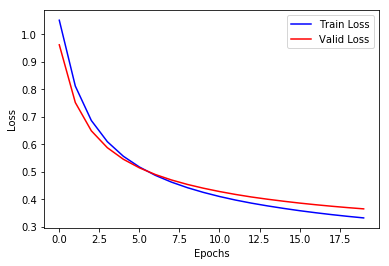

In [58]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'blue',label = "Train Loss")
plt.plot(loss_list_valid,'red',label = "Valid Loss")
plt.legend(loc = 1) #通过参数 loc 指定图例位置

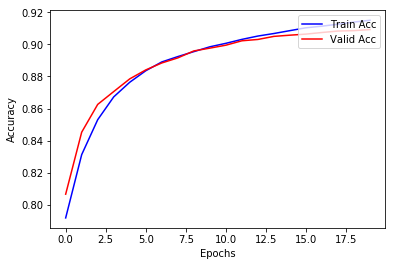

In [59]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc_list_train,'blue',label = 'Train Acc')
plt.plot(acc_list_valid,'red',label = 'Valid Acc')
plt.legend(loc = 1) #通过参数 loc 指定图例位置

## 评估模型
完成训练后，在测试集上评估模型的准确率

In [61]:
acc_test = accuracy(test_x,test_y,W,B).numpy()
print("Test accuracy :",acc_test)

Test accuracy : 0.9109


# 模型应用与可视化
## 应用模型
**在建立模型并进行训练后，若认为准确率可以接受，则可以使用此模型进行预测**

In [63]:
# 定义预测函数
def predict(x,w,b):
    pred = model(x,w,b)# 计算模型预测值
    result = tf.argmax(pred,1).numpy()
    return result

In [64]:
pred_test = predict(test_x,W,B)

In [65]:
pred_test[0]

7

## 定义可视化函数

In [79]:
import matplotlib.pyplot as plot
import numpy as np
def plot_images_label_prediction(images,#图像列表
                                 labels, #标签列表
                                 preds, #y预测值列表
                                 index=0, #从第index个开始显示
                                 num = 10 # 缺省 一次显示10幅
                                ):
    fig = plt.gcf()# 获取当前图表 ，Get Current Figure
    fig.set_size_inches(10,4) #1 英寸 等于2.54cm
    if num > 10:
        num = 10
    for i in range(0,num):
        ax = plt.subplot(2,5,i+1)
        
        ax.imshow(np.reshape(images[index],(28,28)),cmap="binary") # 显示第index 个图像
        
        title = 'label=' + str(labels[index]) #构建该图上要显示的title 信息
        if len(preds)>0:
            title += ",predict=" + str(preds[index])
            
        ax.set_title(title,fontsize = 10) #显示 图上的title 信息
        ax.set_xticks([]);
        ax.set_yticks([])
        index = index + 1
        
    plt.show()


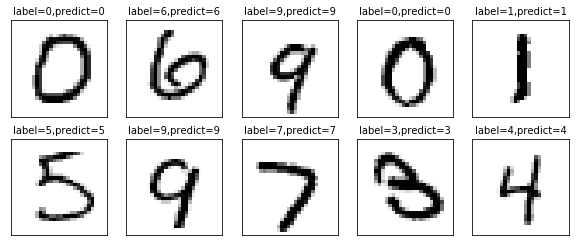

In [80]:
plot_images_label_prediction(test_images,test_labels,pred_test,10,10)